# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [101, 222,300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1420,10810,16267,1593,6766,1838
1,5041,1115,2856,7496,256,375
2,16448,6243,6360,824,2662,2005


In [6]:
display(samples.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,7636.333333,6056.000000,8494.333333,3304.333333,3228.000000,1406.000000
std,7842.959412,4850.204429,6955.592306,3650.396189,3291.700472,896.768086
min,1420.000000,1115.000000,2856.000000,824.000000,256.000000,375.000000
25%,3230.500000,3679.000000,4608.000000,1208.500000,1459.000000,1106.500000
50%,5041.000000,6243.000000,6360.000000,1593.000000,2662.000000,1838.000000
75%,10744.500000,8526.500000,11313.500000,4544.500000,4714.000000,1921.500000
max,16448.000000,10810.000000,16267.000000,7496.000000,6766.000000,2005.000000


In [5]:
print "Mean values of Sample dataset: "
display(samples - np.around(data.mean().values))

print "Median values :"
display(samples - np.around(data.median().values))



Mean values of Sample dataset: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-10580.0,5014.0,8316.0,-1479.0,3885.0,313.0
1,-6959.0,-4681.0,-5095.0,4424.0,-2625.0,-1150.0
2,4448.0,447.0,-1591.0,-2248.0,-219.0,480.0


Median values :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-7084.0,7183.0,11511.0,67.0,5950.0,872.0
1,-3463.0,-2512.0,-1900.0,5970.0,-560.0,-591.0
2,7944.0,2616.0,1604.0,-702.0,1846.0,1039.0


Heatmap


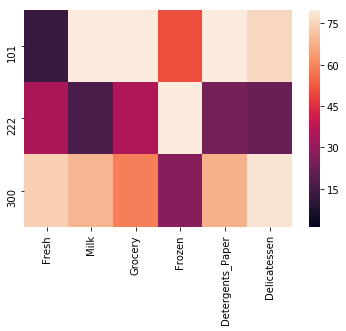

In [6]:
print "Heatmap"
import seaborn as sns
percent = data.rank(pct=True)
percent = 100*percent.round(decimals=3)
percent = percent.iloc[indices]
sns.heatmap(percent, vmin=1, vmax=80)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

#### Customer 101 : 
   * The purchase cost of the groceries for this customer is 16267 which is twice than mean value of grocery.
   * The purchase cost of milk ( 10810) is also twice higher than mean value.
     This customer might be grocery outlet.
#### Customer 222:
   *  The purchase cost of frozen items is 7496 which is more than mean value
   *  This might be an Backery / ice creame parlor / Restaurant  
#### Customer 300:
   *  The purchases for fresh produce is 16,448.
   *  The customer might be having Food items / fruits / vegetables etc... This might be a Restaurant 
The mean values
   * Fresh   - 7636.33 
   * Milk    - 6056.00
   * Grocery - 8494.33
   * Frozen  - 3304.33
   * Detergents_Paper - 3228.00
   * Delicatessen - 1406.00 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Delicatessen'], axis=1)
new_test = data['Delicatessen']

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, new_test, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42, max_depth=2)
regressor.fit(X_train,y_train)
#regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score_delicatessen = regressor.score(X_test, y_test)


print 'Score of Delicatessen: %.3f' % abs(score_delicatessen)




Score of Delicatessen: 0.106


In [11]:
new_data1 = data.drop(['Detergents_Paper'], axis =1)
new_test1 = data['Detergents_Paper']

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data1, new_test1, test_size=0.25, random_state=20)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=20, max_depth = 5)
regressor.fit(X_train,y_train)
#regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)


print 'Score: %.3f' % abs(score)

Score: 0.768


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

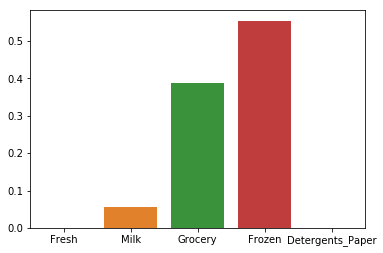

In [10]:
import seaborn as sns
sns.barplot(X_train.columns, regressor.feature_importances_)

**Answer:**

 **Feature to predict**: 
 I tried to predict 'Delicatessen' in the beginning and found R2 as 0.106
 
 I also tried to check for Detergents_Paper. The score for this is .768 which indicates that, other features correlate with 'Deteregents_paper'.
 
 This feature is not important to identify the spending habits of customer
  

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

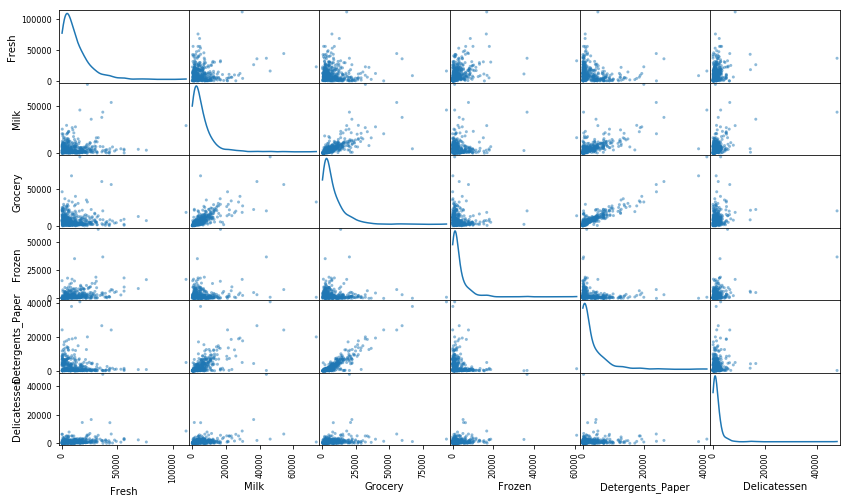

In [11]:
# Produce a scatter matrix for each pair of features in the data

pd.pandas.plotting.scatter_matrix(data,figsize=(14,8),diagonal='kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

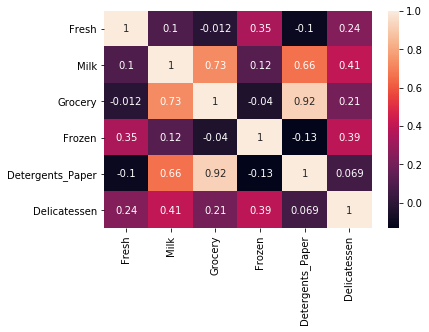

In [15]:
sns.heatmap(data.corr(), annot=True)

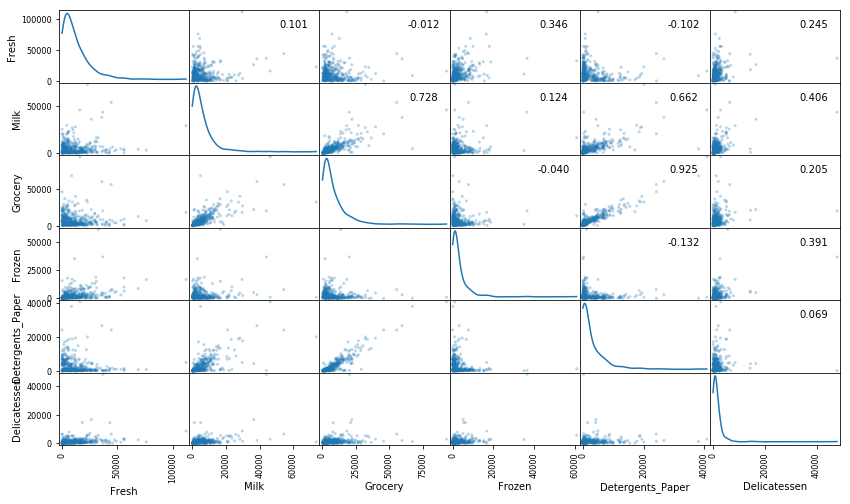

In [21]:
axes = pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

In [22]:
display(data.mean())
display(data.median())

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

**Answer:** 
* Detergent_paper and Grocery :In the scatter box above , the correlation is strongly evident. 
* The correlated coefficient is 0.92

* Milk and Grociery is also related . The correlated coefficient is 0.73
* Detergent Paper and Milk is also having linear correlation of 0.66


* So Detergent_papaer has week relevance . It doesn't provide any information gain by adding that parameter.

**How is the data distributed for these features**

 * As we can see from the Scotter plot,  the distribution for the points seem highly skewed towards the origin, and don't follow a normal distribution.
   
 * Also in the above table , a list of mean values and median values are tabulated for all categories.
 * We can observe that mean values for each category are larger than median values. This is a positively skewed distribution. 
 * This emphasizes the need to identify the outliers and drop them.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

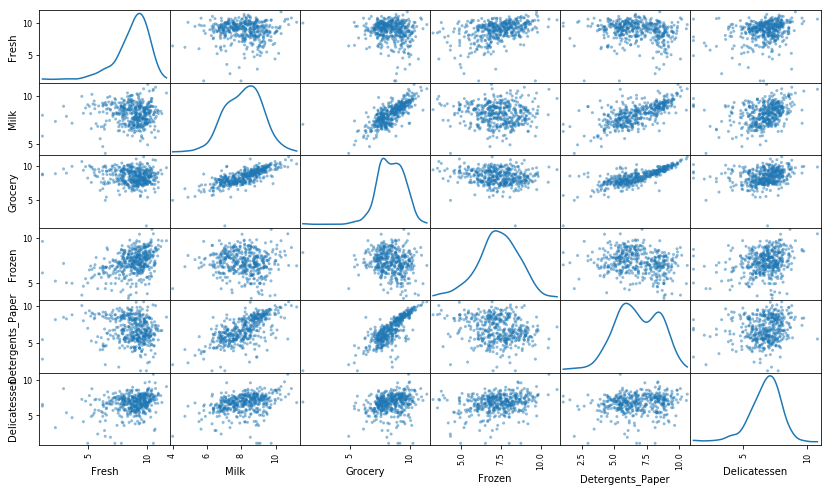

In [13]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.pandas.plotting.scatter_matrix(log_data,figsize=(14,8),diagonal='kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [14]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.258412,9.288227,9.696894,7.373374,8.819665,7.516433
1,8.525360,7.016610,7.957177,8.922125,5.545177,5.926926
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [15]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
   # print "outliers:", step
   # Display the outliers
    
    print "The step size is {}".format(step)
    print("Data points considered outliers for the feature '{}':".format(feature))
    
    features_outliers = display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    display(features_outliers)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [66,65,75,128,154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

The step size is 1.15884823768
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
12,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
14,10.112654,9.155356,9.400217,5.683580,8.528726,7.681560
22,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
23,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
24,10.027783,9.187686,9.531844,7.977625,8.407825,8.661813
29,10.671000,7.649693,7.866722,7.090077,7.009409,6.712956
32,9.981929,7.183871,7.967627,5.583496,6.822197,6.003887
33,10.299878,8.473450,8.899185,8.720950,5.888878,6.987490
35,6.533789,8.610866,9.313889,6.725034,8.352083,6.077642


None

The step size is 2.22846443094
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


None

The step size is 1.71901198895
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
61,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
85,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
131,7.650169,6.378426,5.749393,5.846439,4.248495,5.736572
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
211,9.402530,10.251535,10.588955,8.462948,9.873544,7.962067


None

The step size is 3.31641966725
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


None

The step size is 4.90878415382
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


None

The step size is 4.21312430561
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612


None

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** 

* Outliers does play an important role. They will skew the results. 
* Based on the outlier step, there are 42 data points that are considered outliers. 
* However, only a few of these are considered outliers for more than one feature (i.e. indeces 65,66,75,128,154)

    65: An outlier for Frozen and Fresh
    66: An outlier for Delicatessen and Fresh
    75: An outlier for Detergents_Paper and Grocery.
    154: An outlier for Delicatessen, Milk and Grocery.
    128: An outlier for Delicatessen and Fresh.
   
   So these outliers can be ignored.
   
All of the outliers are due to the abnormally low numbers which fall well below the IQR. 
The above mentioned outliers are more anamolous given that they cause skewed data in multiple features.

Since They do not add any value to any predictive models, and would only skew the results.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

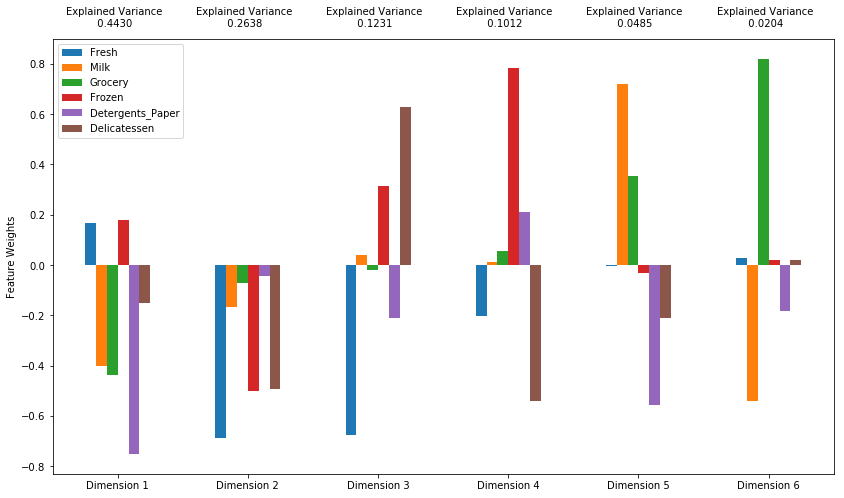

In [16]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns))
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
#pca = PCA(n_components=1)
pca_samples = pca.transform(log_samples)
                            
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [26]:
display(pca_results)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.44302505,  0.70681723,  0.82988103,  0.93109011,  0.97959207,  1.        ])

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [18]:
display(pca_results['Explained Variance'].cumsum())

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

**Answer:**

   **Total Variance by First and second PC:**
       * First PC : 44.24
       * Second PC: 26.38
       * Total    : 70.68% 
                
   **First 4 Componenets:**
       * Third PC : 12.31
       * Fourth PC: 10.12
       * Total : 93.11%
              
 ** Cumilative variance of each dimension: **
      The cumilative variance is shown above in the table
         
 **PC1**:         
    The first principal component is strongly correlated with three of the original variables. 
    This component increases with large decrease in Detergents_Paper, Grocery, Milk cost. This suggests that they vary together. The customer might be a Grocery store.
    
 **PC2:**
    The second principle component increses with large in Fresh, Frozen and delicatessan. This shows strong correllation. This characteristic shows that this customer is a Fresh produce store or a restaurant.
    
 **PC3:**
    The increse in principle component-3 is attributed to large decrese in Fresh, and increse in delicatessan. 
    Frozen products is also contributing to increse in PC-3
    
 **PC4:**
    The increse in PC-4 is attributed large increase in Frozen and large decrease in Delicatessan  
    Increase in detergent_paper and decrease in Fresh also contributed for the change in PC-4. 
   
 **PC5:**
    The increse in PC5 is because of large increase in Milk and decrease in Detergent_paper.
    increase in Grocery and slight decrese Delicatessan contributed for increase in PC5. 
    
        
 **PC6:**
    The increse in PC6 is because of very large increase in growth of Grocery and decrease in Milk.   
   This could represent the 'Grocery' or 'supermarket' spending category.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.8929,0.2367,1.1485,0.4079,-0.0238,-0.0071
1,1.9682,0.0198,0.4150,1.4152,-0.1703,0.4271
2,-1.2804,-0.9587,-0.4701,-0.9124,-0.2345,-0.2514


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941


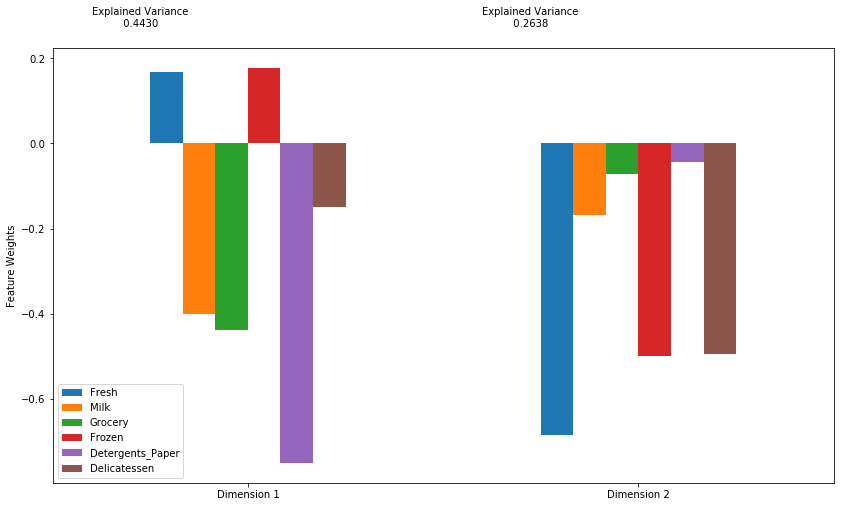

In [20]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above

pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.8929,0.2367
1,1.9682,0.0198
2,-1.2804,-0.9587


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

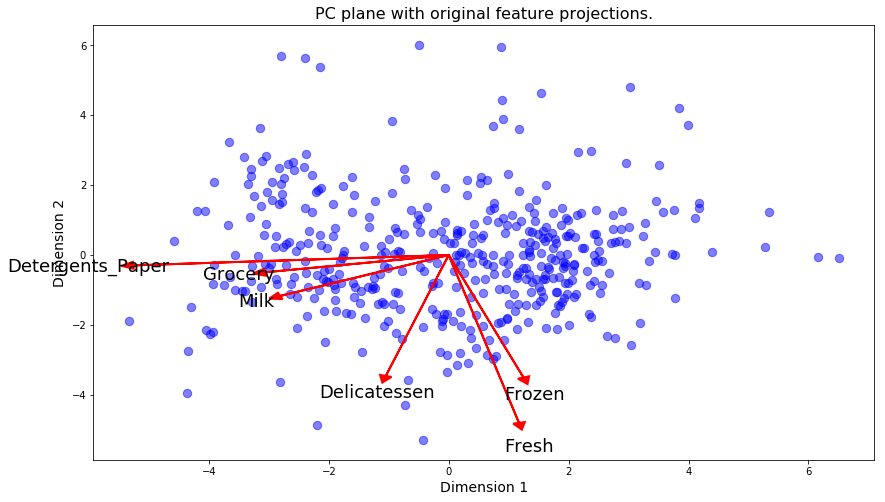

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
**Advantages of K-Means:**
 * Easy to implement
 * If K is small, K-means may be computationally faster than hierarchical clustering , with large number of variables.
 * K-Means may produce tighter clusters than hierachical clustering
 * An instance can change cluster , when the centriods are recomputed.

 **Advantages of GMM:**
  * GMMs deliver a soft-assignment of clusters. 
  * That is, each data point is assigned a probability for each cluster, indicating how likely it belongs to the cluster. 
  * K-means only provides hard assignments, i.e., it chooses a single cluster for each data point. 
  * GMMs can also fit more complex cluster shapes since each mixture component can freely fit its covariance matrix.
  
  **which of the two algorithms will you use and why**
  
  * If we observe biplot above, the data points are mostly densily packed and difficult distinguish to which cluster they belong to.
  * we can also observe that some dimensions have strong correlation with each other  like milk, Grocery, detergents etc..
  
   
   - Based on the  facts above, Gausian Mixture Models will produce best results.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

#KMEANS Implementation

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

def executeKmeans(k):
    global clusterer, preds, centers, sample_preds
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=k, random_state=0).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers= clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return(score)
scores = []
for k in range(2,10):
    scores.append((k,executeKmeans(k)))
    results = pd.DataFrame(scores)
    
print("KMeans - score:")
results.columns = ["k", "Silhouette Score"]
display(results)


KMeans - score:


,k,Silhouette Score
0,2,0.426281
1,3,0.396891
2,4,0.332010
3,5,0.350991
4,6,0.366609
5,7,0.363315
6,8,0.350994
7,9,0.354141


GMM Implementation

In [24]:
type (reduced_data)

pandas.core.frame.DataFrame

In [25]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
from sklearn import mixture
import pandas as pd
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

def executeGMM(k): 
    global clusterer, preds, centers, sample_preds
    
    # TODO: Apply your clustering algorithm of choice to the reduced data
    clusterer = GMM(n_components=k, random_state = 0).fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
    centers = clusterer.means_
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return(score)
  

#results = pd.DataFrame(columns=['Silhouette Score'])
#results.columns.name = 'Number of Clusters'
scores = []
for k in range(2,10):
    scores.append((k, executeGMM(k)))
results = pd.DataFrame(scores)
print("GMM - score:")
results.columns = ["k", "Silhouette Score"]
display(results)
    

GMM - score:


,k,Silhouette Score
0,2,0.411819
1,3,0.373561
2,4,0.308243
3,5,0.295441
4,6,0.276479
5,7,0.323120
6,8,0.312067
7,9,0.290998


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** 
  * The silhouette scores for both GMM and K means are displayed above in tables for 10 clusters each.
  * Silhouette coefficients near +1, indicate that the sample is far away from the neighboring clusters.
  
  - So the coeffients for Gaussian Mixture Model with two clusters has the best silhouette score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

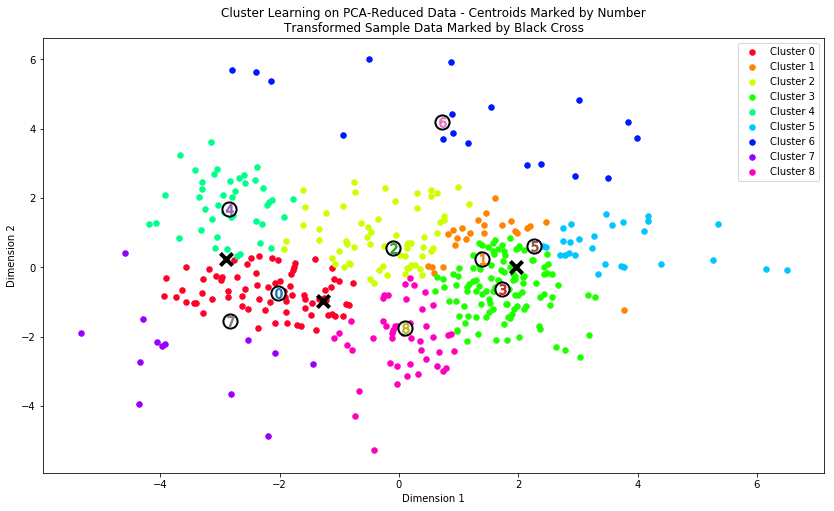

In [26]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [27]:
import numpy as np
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,7548.0,8624.0,12063.0,1525.0,4228.0,1569.0
Segment 1,6903.0,1857.0,2515.0,1731.0,310.0,583.0
Segment 2,4318.0,3215.0,4744.0,1130.0,944.0,624.0
Segment 3,13090.0,1880.0,2317.0,2811.0,252.0,847.0
Segment 4,1262.0,8024.0,14590.0,395.0,7084.0,540.0
Segment 5,6203.0,1234.0,1678.0,1680.0,159.0,427.0
Segment 6,408.0,1258.0,2558.0,211.0,436.0,91.0
Segment 7,11517.0,13666.0,18204.0,1984.0,8033.0,2647.0
Segment 8,21751.0,4373.0,5126.0,3717.0,899.0,1896.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** 
 * As explained in bar plots below, A customer who is assigned to `'Cluster 0'` is having most of purchases done for 'Fresh', Frozen and Milk. So this could be a 'Restaurant' or a convinience store.
 
* Customers in Cluster-1 have more puchases for 'Grocery', milk.  
* These establishments are likely ' Grocery stores' 

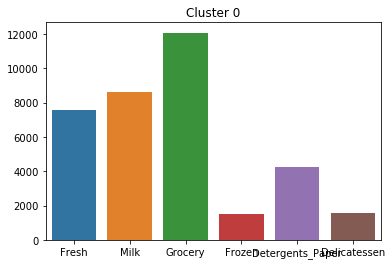

In [28]:
import matplotlib.pyplot as plt
plt.axes().set_title("Cluster 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

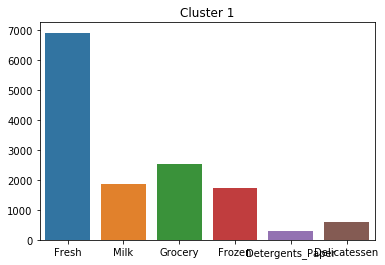

In [29]:
plt.axes().set_title("Cluster 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)

**Answer:**
* Customers assigned to Segment 0 has more purchases on Fresh products compared to the average purchase costs. This group might be a convinience store providing fresh produce.
  
* The customera assigned to Cluster 1 most likely represents a Grocery store as they have higher than average purchase costs of Groceries and Milk and detergent_paper

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [30]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 4)
('Sample point', 1, 'predicted to be in Cluster', 3)
('Sample point', 2, 'predicted to be in Cluster', 0)


**Answer:** 
* It seems my initial intution is correct .
* Customer 100 has high purchase costs in Groceries , so he should be part of cluster 1. The customer might be a Grocery store.
* customer 222 is having more purchase with Frozen items produce. This customer is part of cluster 0 is as expected

* Customer 300 has high purchase costs with Fresh produce. This is part of cluster 1 , but as per initial understanding , I thought it should be in cluster 0.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

* The main idea of wholesale distributer is to change the delivery strategy. The GMM has categorized the data into two clusters. Cluster-1 is having most of the purchases in grociries. The group is mainly having non perishable products.
Even if delivery schedule is modified to 5 days the customers in Cluster-1 might agree. Even if there are some perishable products , the store can have more supplies to manage  .

* But the customer in Segment 0 uses Fresh and Milk products, would have substantial impact by the change in delivery service. This is because their products are highly perishable such fruits, milk, vegetables, seafood and meatetc..

### A/B Testing
* To test the impact of change in delivery schedule, the wholesale distributor can run some A/B tests.

* We randomly pick up 2 sets of customers from each of the two segments. We numerate them in the order 0a, 0b, 1a, 1b. 0a, 0b are the two sets from Segment 0. 1a, 1b are the two sets from Segment 1.

* We will change the delivery schedules for group 0a and 1a keeping the schedules for 0b and 1b unchanged.
* And we can also monitor their spending on different categories to see whether some of them will decrease or not.

* Clients experiencing a negative impact would have a low satisfaction level and a decreased spending. And clients experiencing a positive impact would have a high satisfaction level and an increased or similar spending.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

     >  The wholesale distributor could use a supervised machine learning classification 
    algorithm like SVM, or decision tree classifier, etc using annual customer spending 
    as input and the customer segments, as obtained from GMM clustering, as the target variable.
     
     >  Once the classifier is trained it can be used to predict the customer segment for 
    new customers.
    
  * We can use estimated annual spending for new customer as input and try to evalute to which cluster new customer belongs to.
  * This would determine the delivery schedule for new customer.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

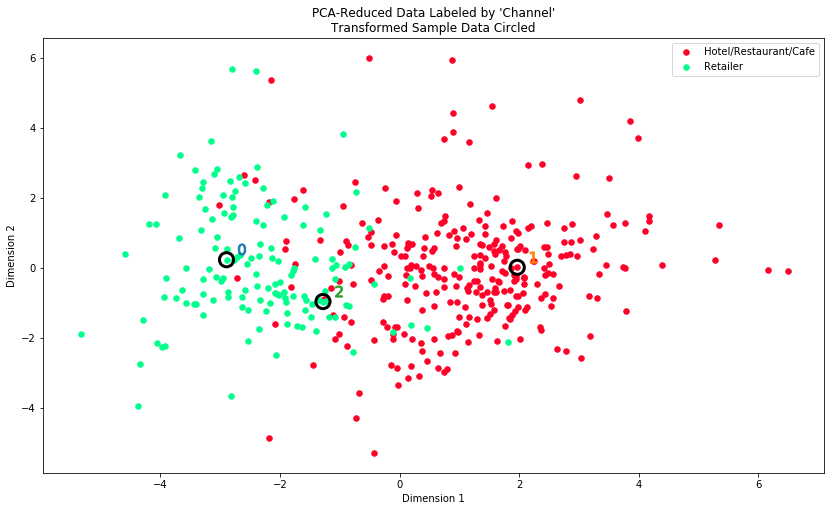

In [31]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

   * GMM Classifies entire data into two clusters which is very consistent with underlying data.
   * Though it might not be able to capture some anamolous data points, which can be ignored as special cases like retailers being classified as hotels/ restaurants.
   * Cluster-0 has much more spending on fresh produce , which could be considered as "Hotels / Restaurants/ cafes"
   * Cluster-1 has more spending on Grociries/ Detergents / Milk etc which can be classified as retailers.

 > The claasification is very consistent broadly with initial definition of customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.